In [216]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from sklearn.metrics import mean_squared_error,mean_absolute_error
import xgboost as xgb
import numpy as np

In [217]:
import pandas as pd

def delete_rows_with_same_values(df, columns_to_check):
    X = df.copy()  # Make a copy of the DataFrame to avoid modifying the original
    X.sort_values(by="ddG", ascending=False)
    # Identify rows where specified columns have the same value
    rows_to_delete = X.duplicated(subset=columns_to_check, keep='first') 

    # Invert the boolean mask to keep rows that don't have the same values in specified columns
    X_filtered = X[~rows_to_delete]

    return X_filtered

columns_to_check_for_duplicates = ['starting electrophile SMILES', 'nucleophile SMILES',
        '3,3 Catalyst Substituent ', 'Temperature (Kelvin)', 
        'N Catalyst Substituent']


In [218]:

result = pd.read_csv("merged_max.csv")
result = delete_rows_with_same_values(result, columns_to_check_for_duplicates)
result.to_csv("sterimol/clean_merged_max.csv")
result= pd.read_csv("sterimol/clean_merged_max.csv")
result

,Unnamed: 0.2,Unnamed: 0.1,reaction,starting electrophile SMILES,input electrophile SMILES,nucleophile SMILES,"3,3 Catalyst Substituent",N Catalyst Substituent,solvent,Temperature (Celsius),...,Bmin_n,Bmax_n,bur_shell_n,bur_vol_n,max_distance_n,tot_V_n,disp_n,max_axis_n,A2_n,min_axis_n
0,0,0,1a,O=Cc2ccc1ccccc1c2,O=Cc2ccc1ccccc1c2,C=CC[Si](C)(C)C,c2ccc1ccccc1c2,NS(=O)(=O)C(F)(F)F,toluene,-78,...,1.7,6.207878,0.0,33.645354,7.003162,120.049756,2.899662,6.909497,0.706155,0.515373
1,1,1,1b,COc2ccc1cc(C=O)ccc1c2,COc2ccc1cc(C=O)ccc1c2,C=CC[Si](C)(C)C,c2ccc1ccccc1c2,NS(=O)(=O)C(F)(F)F,toluene,-78,...,1.7,6.207878,0.0,33.645354,7.003162,120.049756,2.899662,6.909497,0.706155,0.515373
2,2,2,1c,O=Cc2ccc1cc(Br)ccc1c2,O=Cc2ccc1cc(Br)ccc1c2,C=CC[Si](C)(C)C,c2ccc1ccccc1c2,NS(=O)(=O)C(F)(F)F,toluene,-78,...,1.7,6.207878,0.0,33.645354,7.003162,120.049756,2.899662,6.909497,0.706155,0.515373
3,3,3,1d,O=Cc1ccccc1,O=Cc1ccccc1,C=CC[Si](C)(C)C,c2ccc1ccccc1c2,NS(=O)(=O)C(F)(F)F,toluene,-78,...,1.7,6.207878,0.0,33.645354,7.003162,120.049756,2.899662,6.909497,0.706155,0.515373
4,4,4,1e,O=Cc1ccccc1F,O=Cc1ccccc1F,C=CC[Si](C)(C)C,c1ccc3c(c1)CCc2ccccc23,NS(=O)(=O)C(F)(F)F,toluene,-60,...,1.7,6.207878,0.0,33.645354,7.003162,120.049756,2.899662,6.909497,0.706155,0.515373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,333,333,3e,CC/C=C(C)/C=O,CC/C=C(C)/C=O,C1=CCC=C1,c3ccc2ccc1ccccc1c2c3,NS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,CH2Cl2,-100,...,1.7,4.364412,0.0,34.646654,4.400312,29.406022,3.188841,4.400312,0.848067,0.406964
319,334,334,3f,O=CC1=CCCCC1,O=CC1=CCCCC1,C1=CCC=C1,c3ccc2ccc1ccccc1c2c3,NS(=O)(=O)C(F)(F)C(F)(F)F,CH2Cl2,-100,...,1.7,4.364412,0.0,34.646654,4.400312,29.406022,3.188841,4.400312,0.848067,0.406964
320,335,335,3u,C/C=C(C)/C=O,C/C=C(C)/C=O,C1=CCC=C1,c3ccc2ccc1ccccc1c2c3,NS(=O)(=O)C(F)(F)C(F)(F)F,CH2Cl2,-100,...,1.7,4.364412,0.0,34.646654,4.400312,29.406022,3.188841,4.400312,0.848067,0.406964
321,336,336,3v,O=CC1=CCCC1,O=CC1=CCCC1,C1=CCC=C1,c3ccc2ccc1ccccc1c2c3,NS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,CH2Cl2,-100,...,1.7,4.364412,0.0,34.646654,4.400312,29.406022,3.188841,4.400312,0.848067,0.406964


In [219]:
print(len(np.unique(result['input electrophile SMILES'])),len(np.unique(result['nucleophile SMILES'])),len(np.unique(result['N Catalyst Substituent'])),len(np.unique(result['3,3 Catalyst Substituent '])))

155 49 5 25


In [220]:
from common_functions import *

electrophileSMILES = result['input electrophile SMILES'].values
electrophiledescriptors = smi2RDKIT(electrophileSMILES)
nucleophileSMILES = result['nucleophile SMILES'].values
nucleophiledescriptors = smi2RDKIT(nucleophileSMILES)
threethreesubSMILES = result['3,3 Catalyst Substituent '].values
threethreesubdescriptors = smi2RDKIT(threethreesubSMILES)


In [221]:
alldescriptors = electrophiledescriptors.join(nucleophiledescriptors, lsuffix='electrophile', rsuffix='nucleophile').join(threethreesubdescriptors, rsuffix='threethreesub')#.join(nsubdescriptors, rsuffix='nsubdescriptors')

alldescriptors.to_csv('alldescriptors.csv', index=False)


In [222]:
result.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'reaction',
       'starting electrophile SMILES', 'input electrophile SMILES',
       'nucleophile SMILES', '3,3 Catalyst Substituent ',
       'N Catalyst Substituent', 'solvent', 'Temperature (Celsius)',
       'Temperature (Kelvin)', 'yield (%)', 'ee (%)', 'e.r. 1', 'e.r. 2',
       'ddG', 'reference ', 'Link', 'Unnamed: 0', 'ster1', 'ster2', 'ster3',
       'polarxx', 'polarxy', 'polaryy', 'polarzx', 'polaryz', 'polarzz',
       'mean_polar', 'HOMO', 'LUMO', 'biggest distance', 'major_axis',
       'Axis_2', 'Axis_3', 'Vbur75', 'old_name', 'smiles_e', 'L_e', 'Bmin_e',
       'Bmax_e', 'bur_shell_e', 'bur_vol_e', 'max_distance_e', 'tot_V_e',
       'disp_e', 'max_axis_e', 'A2_e', 'min_axis_e', 'smiles_n', 'L_n',
       'Bmin_n', 'Bmax_n', 'bur_shell_n', 'bur_vol_n', 'max_distance_n',
       'tot_V_n', 'disp_n', 'max_axis_n', 'A2_n', 'min_axis_n'],
      dtype='object')

In [223]:

unique_counts = alldescriptors.nunique()

# Get the column names where there is more than one unique value
cols_to_keep = unique_counts[unique_counts > 1].index

# Create a new DataFrame with only the selected columns
result_df = alldescriptors[cols_to_keep]
result_df

,MaxAbsEStateIndexelectrophile,MaxEStateIndexelectrophile,MinAbsEStateIndexelectrophile,MinEStateIndexelectrophile,qedelectrophile,MolWtelectrophile,HeavyAtomMolWtelectrophile,ExactMolWtelectrophile,NumValenceElectronselectrophile,MaxPartialChargeelectrophile,...,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_alkyl_halide,fr_aryl_methyl,fr_benzene,fr_bicyclic,fr_halogen,fr_unbrch_alkane
0,10.450170,10.450170,0.730278,0.730278,0.579913,156.184,148.120,156.057515,58.0,0.149570,...,0.0,2.0,2.8398,43.948,0.0,0.0,2.0,1.0,0.0,0.0
1,10.548588,10.548588,0.696914,0.696914,0.673793,186.210,176.130,186.068080,70.0,0.149570,...,0.0,2.0,2.8398,43.948,0.0,0.0,2.0,1.0,0.0,0.0
2,10.507847,10.507847,0.717428,0.717428,0.691883,235.080,228.024,233.968027,64.0,0.149570,...,0.0,2.0,2.8398,43.948,0.0,0.0,2.0,1.0,0.0,0.0
3,10.006481,10.006481,0.729167,0.729167,0.495636,106.124,100.076,106.041865,40.0,0.149548,...,0.0,2.0,2.8398,43.948,0.0,0.0,2.0,1.0,0.0,0.0
4,12.358704,12.358704,0.108796,-0.465278,0.519899,124.114,119.074,124.032443,46.0,0.152494,...,0.0,3.0,3.4522,59.286,0.0,2.0,2.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,9.826481,9.826481,0.821759,0.821759,0.377957,98.145,88.065,98.073165,40.0,0.144920,...,0.0,3.0,3.9930,61.454,0.0,0.0,3.0,3.0,0.0,0.0
319,10.091620,10.091620,0.971389,0.971389,0.469249,110.156,100.076,110.073165,44.0,0.145202,...,0.0,3.0,3.9930,61.454,0.0,0.0,3.0,3.0,0.0,0.0
320,9.667593,9.667593,0.787037,0.787037,0.343827,84.118,76.054,84.057515,34.0,0.144910,...,0.0,3.0,3.9930,61.454,0.0,0.0,3.0,3.0,0.0,0.0
321,9.938843,9.938843,0.951389,0.951389,0.449462,96.129,88.065,96.057515,38.0,0.145202,...,0.0,3.0,3.9930,61.454,0.0,0.0,3.0,3.0,0.0,0.0


In [224]:
col_names = ['ddG','ster1', 'ster2', 'solvent',
       'ster3',  
       'input electrophile SMILES', 'nucleophile SMILES', 'starting electrophile SMILES',
       'HOMO','LUMO',
       'N Catalyst Substituent', 'Temperature (Kelvin)',
      'mean_polar', #
       'biggest distance',
       'major_axis', 'Axis_2', 'Axis_3' ,
       'L_e', 'Bmin_e', 'Bmax_e', 'bur_vol_e', 
       'L_n', 'Bmin_n', 'Bmax_n', 'bur_vol_n', 
        '3,3 Catalyst Substituent ',
       'tot_V_e', 'disp_e',  
       'Vbur75',
        'tot_V_n', 'disp_n',  
       'max_distance_n','max_distance_e'#'A2_x',  #'A2_y',
       
      ]
DFT_data = result.loc[:,col_names]

DFT_data["Temperature (Kelvin)"] = DFT_data["Temperature (Kelvin)"]
DFT_data["Box_vol"] = DFT_data['major_axis']*DFT_data['Axis_2']*DFT_data['Axis_3']
DFT_data["RAxis_2"] = DFT_data['Axis_2']/DFT_data['major_axis']
DFT_data["RAxis_3"] = DFT_data['Axis_3']/DFT_data['major_axis']
DFT_data["disp_n"] = DFT_data['disp_n']/DFT_data['max_distance_n']
DFT_data["disp_e"] = DFT_data['disp_e']/DFT_data['max_distance_e']


DFT_data = DFT_data.drop(['Axis_2','Axis_3','max_distance_n','max_distance_e'],axis=1)
encoder = OneHotEncoder(drop='first', sparse=False)  

DFT_data['Ncat_alif'] = DFT_data['N Catalyst Substituent'].apply(lambda x: 1 if x == 'NS(=O)(=O)C(F)(F)F' else (2 if x == 'NS(=O)(=O)C(F)(F)C(F)(F)F' else (4 if x == 'NS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F' else ( 6 if x == 'NS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F' else 0))))

# Create another column 'DifferentColumn' and assign values based on different conditions
DFT_data['Ncat_arom'] = DFT_data['N Catalyst Substituent'].apply(lambda x: 1 if x == 'NS(=O)(=O)c1c(F)c(F)c(F)c(F)c1F' else 0)




ddg= result.loc[:,'ddG']

ddg


0      1.231712
1      1.066407
2      1.002518
3      0.896691
4      1.033884
         ...   
318    1.338303
319    1.338303
320    1.092856
321    1.195347
322    0.537292
Name: ddG, Length: 323, dtype: float64

In [225]:
import pickle
with open('sterimol/subsets_electrophile.pickle', 'rb') as infile:
    subsets_e = pickle.load(infile)
with open('sterimol/subsets_nucleophile.pickle', 'rb') as infile:
    subsets_n = pickle.load(infile)



def create_matrix(data_dict):
    unique_smi_values = set(entry[key] for entry in data_dict.values() for key in ['smi1', 'smi2'])

    # Create an empty similarity matrix
    num_unique_values = len(unique_smi_values)
    similarity_matrix = np.zeros((num_unique_values, num_unique_values))

    # Create a dictionary to map each unique value to its index in the matrix
    value_to_index = {value: index for index, value in enumerate(unique_smi_values)}
    smi1_to_matrix_index = {smi1: [] for smi1 in unique_smi_values}
    
    # Fill in the similarity matrix with 'tan_mcs' or 'tan_12' values
    for entry in data_dict.values():
        index1 = value_to_index[entry['smi1']]
        smi1_to_matrix_index[entry['smi1']].extend([index1])
        # Check if 'smi2' exists in the entry
        if 'smi2' in entry:
            index2 = value_to_index[entry['smi2']]
            smi1_to_matrix_index[entry['smi2']].append(index2)
            
            # Assuming either 'tan_mcs' or 'tan_12' will be present in each entry
            tan_value_key = 'tan_mcs' 
            
            similarity_matrix[index1, index2] = entry[tan_value_key]
            similarity_matrix[index2, index1] = entry[tan_value_key]

        
 
        
    # Convert lists of row indices to unique sets
    smi1_to_matrix_index = {smi1: list(set(indices)) for smi1, indices in smi1_to_matrix_index.items()}
    
    return similarity_matrix, smi1_to_matrix_index



mat_e, dict_e = create_matrix(subsets_e)
mat_n, dict_n = create_matrix(subsets_n)



In [226]:
DFT_data

,ddG,ster1,ster2,solvent,ster3,input electrophile SMILES,nucleophile SMILES,starting electrophile SMILES,HOMO,LUMO,...,tot_V_e,disp_e,Vbur75,tot_V_n,disp_n,Box_vol,RAxis_2,RAxis_3,Ncat_alif,Ncat_arom
0,1.231712,8.98,1.70,toluene,4.42,O=Cc2ccc1ccccc1c2,C=CC[Si](C)(C)C,O=Cc2ccc1ccccc1c2,-0.26066,-0.02697,...,0.001207,0.340037,10.694121,120.049756,0.414050,130.584488,0.473305,0.185862,1,0
1,1.066407,8.98,1.70,toluene,4.42,COc2ccc1cc(C=O)ccc1c2,C=CC[Si](C)(C)C,COc2ccc1cc(C=O)ccc1c2,-0.26066,-0.02697,...,102.106155,0.933660,10.694121,120.049756,0.414050,130.584488,0.473305,0.185862,1,0
2,1.002518,8.98,1.70,toluene,4.42,O=Cc2ccc1cc(Br)ccc1c2,C=CC[Si](C)(C)C,O=Cc2ccc1cc(Br)ccc1c2,-0.26066,-0.02697,...,0.001092,0.958748,10.694121,120.049756,0.414050,130.584488,0.473305,0.185862,1,0
3,0.896691,8.98,1.70,toluene,4.42,O=Cc1ccccc1,C=CC[Si](C)(C)C,O=Cc1ccccc1,-0.26066,-0.02697,...,0.001296,0.497507,10.694121,120.049756,0.414050,130.584488,0.473305,0.185862,1,0
4,1.033884,11.14,2.13,toluene,4.49,O=Cc1ccccc1F,C=CC[Si](C)(C)C,O=Cc1ccccc1F,-0.26081,-0.02053,...,0.001254,0.310178,7.767809,120.049756,0.414050,238.869273,0.404818,0.238722,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,1.338303,11.15,1.70,CH2Cl2,4.49,CC/C=C(C)/C=O,C1=CCC=C1,CC/C=C(C)/C=O,-0.26240,-0.02488,...,80.426018,0.434489,7.767166,29.406022,0.724685,170.347416,0.409886,0.167639,4,0
319,1.338303,11.15,1.70,CH2Cl2,4.49,O=CC1=CCCCC1,C1=CCC=C1,O=CC1=CCCCC1,-0.26240,-0.02488,...,80.781766,0.410741,7.767166,29.406022,0.724685,170.347416,0.409886,0.167639,2,0
320,1.092856,11.15,1.70,CH2Cl2,4.49,C/C=C(C)/C=O,C1=CCC=C1,C/C=C(C)/C=O,-0.26240,-0.02488,...,37.591729,0.382726,7.767166,29.406022,0.724685,170.347416,0.409886,0.167639,2,0
321,1.195347,11.15,1.70,CH2Cl2,4.49,O=CC1=CCCC1,C1=CCC=C1,O=CC1=CCCC1,-0.26240,-0.02488,...,50.989746,0.383794,7.767166,29.406022,0.724685,170.347416,0.409886,0.167639,4,0


In [227]:
# choose 200 molecular descriptors
chosen_descriptors  = ['ExactMolWt',  'Kappa1', 'MaxEStateIndex', 'MaxPartialCharge',   'MinEStateIndex', 'MinPartialCharge', 'MolLogP', 'MolMR', 'MolWt', 'NumRotatableBonds', 'PEOE_VSA1', 'SMR_VSA1', 'SlogP_VSA1', 'VSA_EState1', 'qed']
chosen_descriptors  = ['Kappa1','MaxPartialCharge',   'MinEStateIndex', 'MinPartialCharge', 'MolLogP',  'ExactMolWt','qed']
chosen_descriptors2 = ['Kappa1','ExactMolWt', 'MaxPartialCharge','MinEStateIndex', 'MinPartialCharge',  'MolLogP']


In [228]:
def add_suffixes(input_list,input_list2):
    result_list = []
    for entry in input_list:
        result_list.append(entry + 'electrophile')
        result_list.append(entry + 'nucleophile')
    for entry in input_list2:
        result_list.append(entry + '')
    return result_list

# Example list


# Add suffixes '_e' and '_n' to each entry
output_list = add_suffixes(chosen_descriptors,chosen_descriptors2)

# Display the result
print(output_list)

['Kappa1electrophile', 'Kappa1nucleophile', 'MaxPartialChargeelectrophile', 'MaxPartialChargenucleophile', 'MinEStateIndexelectrophile', 'MinEStateIndexnucleophile', 'MinPartialChargeelectrophile', 'MinPartialChargenucleophile', 'MolLogPelectrophile', 'MolLogPnucleophile', 'ExactMolWtelectrophile', 'ExactMolWtnucleophile', 'qedelectrophile', 'qednucleophile', 'Kappa1', 'ExactMolWt', 'MaxPartialCharge', 'MinEStateIndex', 'MinPartialCharge', 'MolLogP']


In [229]:

unique_counts = alldescriptors.nunique()

# Get the column names where there is more than one unique value
cols_to_keep = unique_counts[unique_counts > 1].index

# Create a new DataFrame with only the selected columns
result_df = alldescriptors[output_list]
result_df

,Kappa1electrophile,Kappa1nucleophile,MaxPartialChargeelectrophile,MaxPartialChargenucleophile,MinEStateIndexelectrophile,MinEStateIndexnucleophile,MinPartialChargeelectrophile,MinPartialChargenucleophile,MolLogPelectrophile,MolLogPnucleophile,ExactMolWtelectrophile,ExactMolWtnucleophile,qedelectrophile,qednucleophile,Kappa1,ExactMolWt,MaxPartialCharge,MinEStateIndex,MinPartialCharge,MolLogP
0,7.042665,6.956883,0.149570,0.047963,0.730278,-0.775270,-0.297896,-0.103369,2.6523,2.5106,156.057515,114.086477,0.579913,0.382049,5.482230,128.06260,-0.018404,1.310185,-0.061630,2.8398
1,8.754380,6.956883,0.149570,0.047963,0.696914,-0.775270,-0.496745,-0.103369,2.6609,2.5106,186.068080,114.086477,0.673793,0.382049,5.482230,128.06260,-0.018404,1.310185,-0.061630,2.8398
2,8.448344,6.956883,0.149570,0.047963,0.717428,-0.775270,-0.297896,-0.103369,3.4148,2.5106,233.968027,114.086477,0.691883,0.382049,5.482230,128.06260,-0.018404,1.310185,-0.061630,2.8398
3,5.035138,6.956883,0.149548,0.047963,0.729167,-0.775270,-0.297896,-0.103369,1.4991,2.5106,106.041865,114.086477,0.495636,0.382049,5.482230,128.06260,-0.018404,1.310185,-0.061630,2.8398
4,5.947877,6.956883,0.152494,0.047963,-0.465278,-0.775270,-0.297781,-0.103369,1.6382,2.5106,124.032443,114.086477,0.519899,0.382049,7.807968,180.09390,-0.014904,1.187685,-0.061951,3.4522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,6.410000,2.703214,0.144920,-0.016293,0.821759,1.138889,-0.298281,-0.080750,1.5416,1.5025,98.073165,66.046950,0.377957,0.401713,7.571439,178.07825,-0.010542,1.311296,-0.061629,3.9930
319,5.544953,2.703214,0.145202,-0.016293,0.971389,1.138889,-0.298269,-0.080750,1.6857,1.5025,110.073165,66.046950,0.469249,0.401713,7.571439,178.07825,-0.010542,1.311296,-0.061629,3.9930
320,5.410000,2.703214,0.144910,-0.016293,0.787037,1.138889,-0.298281,-0.080750,1.1515,1.5025,84.057515,66.046950,0.343827,0.401713,7.571439,178.07825,-0.010542,1.311296,-0.061629,3.9930
321,4.566006,2.703214,0.145202,-0.016293,0.951389,1.138889,-0.298269,-0.080750,1.2956,1.5025,96.057515,66.046950,0.449462,0.401713,7.571439,178.07825,-0.010542,1.311296,-0.061629,3.9930


In [230]:
alldesc = pd.concat([result_df ,DFT_data], axis=1)

alldesc

,Kappa1electrophile,Kappa1nucleophile,MaxPartialChargeelectrophile,MaxPartialChargenucleophile,MinEStateIndexelectrophile,MinEStateIndexnucleophile,MinPartialChargeelectrophile,MinPartialChargenucleophile,MolLogPelectrophile,MolLogPnucleophile,...,tot_V_e,disp_e,Vbur75,tot_V_n,disp_n,Box_vol,RAxis_2,RAxis_3,Ncat_alif,Ncat_arom
0,7.042665,6.956883,0.149570,0.047963,0.730278,-0.775270,-0.297896,-0.103369,2.6523,2.5106,...,0.001207,0.340037,10.694121,120.049756,0.414050,130.584488,0.473305,0.185862,1,0
1,8.754380,6.956883,0.149570,0.047963,0.696914,-0.775270,-0.496745,-0.103369,2.6609,2.5106,...,102.106155,0.933660,10.694121,120.049756,0.414050,130.584488,0.473305,0.185862,1,0
2,8.448344,6.956883,0.149570,0.047963,0.717428,-0.775270,-0.297896,-0.103369,3.4148,2.5106,...,0.001092,0.958748,10.694121,120.049756,0.414050,130.584488,0.473305,0.185862,1,0
3,5.035138,6.956883,0.149548,0.047963,0.729167,-0.775270,-0.297896,-0.103369,1.4991,2.5106,...,0.001296,0.497507,10.694121,120.049756,0.414050,130.584488,0.473305,0.185862,1,0
4,5.947877,6.956883,0.152494,0.047963,-0.465278,-0.775270,-0.297781,-0.103369,1.6382,2.5106,...,0.001254,0.310178,7.767809,120.049756,0.414050,238.869273,0.404818,0.238722,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,6.410000,2.703214,0.144920,-0.016293,0.821759,1.138889,-0.298281,-0.080750,1.5416,1.5025,...,80.426018,0.434489,7.767166,29.406022,0.724685,170.347416,0.409886,0.167639,4,0
319,5.544953,2.703214,0.145202,-0.016293,0.971389,1.138889,-0.298269,-0.080750,1.6857,1.5025,...,80.781766,0.410741,7.767166,29.406022,0.724685,170.347416,0.409886,0.167639,2,0
320,5.410000,2.703214,0.144910,-0.016293,0.787037,1.138889,-0.298281,-0.080750,1.1515,1.5025,...,37.591729,0.382726,7.767166,29.406022,0.724685,170.347416,0.409886,0.167639,2,0
321,4.566006,2.703214,0.145202,-0.016293,0.951389,1.138889,-0.298269,-0.080750,1.2956,1.5025,...,50.989746,0.383794,7.767166,29.406022,0.724685,170.347416,0.409886,0.167639,4,0


In [231]:
filtered_df = alldesc[alldesc['nucleophile SMILES'] == alldesc['starting electrophile SMILES']]
list_one = np.unique(filtered_df['starting electrophile SMILES'])

list_two = ['C=C(OC)O[Si](C)(C)C','C=C(OC)O[Si](C)(C)C(C)(C)C','CO/C(O[Si](C)(C)C)=C(C)/C','C=C(OC)O[Si](CC)(CC)CC',
'C=C(OC)O[Si]1(C(C)C)C(C)CC1C','C=C(OC1CCCCC1)O[Si](C)(C)C(C)(C)C','C=C(OCc1ccccc1)O[Si](C)(C)C',
'C=C(OCc1ccccc1)O[Si](C)(C)C(C)(C)C','CO/C(=C\C(C)C)O[Si](C)(C)C','CO/C(=C/c1ccccc1)O[Si](C)(C)C','CO/C(=C\c1ccccc1)O[Si](C)(C)C',
'C=CO[Si](C)(C)C(C)(C)C','C=CO[Si](CC)(CC)CC','C=C(/C=C/c1ccccc1)O[Si](C)(C)C(C)(C)C','C=C(O[Si](C)(C)C(C)(C)C)c1ccccc1','C=CC[Si](C)(C)C',
'C=C1C=C(O[Si](C)(C)C)OC(C)(C)O1','C=C(OC)O[Si](C(C)C)(C(C)C)C(C)C','C=C(OC)O[Si](C(C)C)(C(C)C)C(C)C','C=C/C=C(OC(C)C)\O[Si](C)(C)C(C)(C)C',
'C=C/C=C(OC(C)C)\O[Si](C)(C)C(C)(C)C'     ,'CO/C(O[Si](C)(C)C)=C/1CCC1','CO/C(O[Si](C)(C)C)=C/1CCCC1','CO/C(O[Si](C)(C)C)=C/1CCCCC1']


unique_values = [alldesc[col].unique() for col in ['nucleophile SMILES', 'starting electrophile SMILES']]
list_three= [value for value in unique_values[0] if (value not in list_one and value not in list_two)]
filtered_df = alldesc[alldesc['nucleophile SMILES'] == alldesc['starting electrophile SMILES']]
len(filtered_df['starting electrophile SMILES'])

def categorize_id(id):
    if id in list_one:
        return 1
    elif id in list_two:
        return 2
    elif id in list_three:
        return 3
    else:
        return 'Unknown'

# Add a new column 'group' to the DataFrame based on the categorization
alldesc['reaction_group'] = alldesc['nucleophile SMILES'].apply(categorize_id)
react_groups = alldesc['nucleophile SMILES'].apply(categorize_id)
alldesc = pd.get_dummies(alldesc, columns=['reaction_group'])
#alldesc = alldesc.drop(['reaction_group'],axis=1)



In [232]:
alldesc.columns

Index(['Kappa1electrophile', 'Kappa1nucleophile',
       'MaxPartialChargeelectrophile', 'MaxPartialChargenucleophile',
       'MinEStateIndexelectrophile', 'MinEStateIndexnucleophile',
       'MinPartialChargeelectrophile', 'MinPartialChargenucleophile',
       'MolLogPelectrophile', 'MolLogPnucleophile', 'ExactMolWtelectrophile',
       'ExactMolWtnucleophile', 'qedelectrophile', 'qednucleophile', 'Kappa1',
       'ExactMolWt', 'MaxPartialCharge', 'MinEStateIndex', 'MinPartialCharge',
       'MolLogP', 'ddG', 'ster1', 'ster2', 'solvent', 'ster3',
       'input electrophile SMILES', 'nucleophile SMILES',
       'starting electrophile SMILES', 'HOMO', 'LUMO',
       'N Catalyst Substituent', 'Temperature (Kelvin)', 'mean_polar',
       'biggest distance', 'major_axis', 'L_e', 'Bmin_e', 'Bmax_e',
       'bur_vol_e', 'L_n', 'Bmin_n', 'Bmax_n', 'bur_vol_n',
       '3,3 Catalyst Substituent ', 'tot_V_e', 'disp_e', 'Vbur75', 'tot_V_n',
       'disp_n', 'Box_vol', 'RAxis_2', 'RAxis_3', 'Ncat

In [233]:
y_bins = np.ones_like(ddg)
y_bins[ddg < 1] = 0
y_bins[ddg > 2] = 2

xtrain_pre, xtest_pre, ytrain, ytest = train_test_split(alldesc, ddg, test_size=0.2, stratify=react_groups,random_state=1)



In [234]:
def create_sub_matrix(similarity_matrix, smi1_to_matrix_index, smi1_list):
    
    # Extract row indices for valid 'smi1' values
    row_indices = [index for smi in smi1_list for index in smi1_to_matrix_index[smi]]

    # Create the sub-matrix
    sub_matrix = similarity_matrix[row_indices, :][:, row_indices]

    return sub_matrix

def create_sub_matrix_test(similarity_matrix, smi1_to_matrix_index, list1, list2):

    # Extract row indices for valid 'list1' and 'list2' values
    indices_list1 = [index for smi in list1 for index in smi1_to_matrix_index[smi]]
    indices_list2 = [index for smi in list2 for index in smi1_to_matrix_index[smi]]

    # Create the sub-matrix
    sub_matrix = similarity_matrix[indices_list1 , :][:, indices_list2]
    
    return sub_matrix

def create_ddg_sim(mat,vec):
    for i in range(len(vec)):
    
        mat[i,:]=mat[i,:]*vec[i]

    max_ddg=np.max(mat,axis=0)
    min_ddg=np.where(mat>0, mat, np.inf).min(axis=0)
    min_ddg=np.where(min_ddg==np.inf, 0, min_ddg)
    return max_ddg, min_ddg

def preprocess(xtrain, xtest ,mat_e, dict_e,mat_n, dict_n,sim_par=0.7,out_col='all'):

    nuc_uniq_test = np.unique(xtest['nucleophile SMILES'])
    ele_uniq_test = np.unique(xtest['starting electrophile SMILES'])

    average_ddg_by_name_n = xtrain.groupby('nucleophile SMILES')['ddG'].mean().reset_index()
    average_ddg_by_name_e = xtrain.groupby('starting electrophile SMILES')['ddG'].mean().reset_index()
    mat_e = mat_e + np.eye(len(mat_e))
    mat_n = mat_n + np.eye(len(mat_n))
    mat_e[mat_e < sim_par] = 0
    mat_n[mat_n < sim_par] = 0

    train_sim_e = create_sub_matrix(mat_e, dict_e, average_ddg_by_name_e['starting electrophile SMILES'])
    train_sim_n = create_sub_matrix(mat_n, dict_n, average_ddg_by_name_n['nucleophile SMILES'])
    test_sim_e = create_sub_matrix_test(mat_e, dict_e, average_ddg_by_name_e['starting electrophile SMILES'], ele_uniq_test)
    test_sim_n = create_sub_matrix_test(mat_n, dict_n, average_ddg_by_name_n['nucleophile SMILES'], nuc_uniq_test)
    train_sim_ddg_e = np.divide(np.dot(np.where(train_sim_e != 0, 1.0, 0.0),average_ddg_by_name_e['ddG']),np.sum(np.where(train_sim_e != 0, 1.0, 0.0), axis=0))
    train_sim_ddg_n = np.divide(np.dot(np.where(train_sim_n != 0, 1.0, 0.0),average_ddg_by_name_n['ddG']),np.sum(np.where(train_sim_n != 0, 1.0, 0.0), axis=0))
    test_sim_ddg_e = np.divide(np.dot(average_ddg_by_name_e['ddG'],np.where(test_sim_e != 0, 1.0, 0.0)),np.sum(np.where(test_sim_e != 0, 1.0, 0.0), axis=0))
    test_sim_ddg_n = np.divide(np.dot(average_ddg_by_name_n['ddG'],np.where(test_sim_n != 0, 1.0, 0.0)),np.sum(np.where(test_sim_n != 0, 1.0, 0.0), axis=0))

    mean_e=np.mean(average_ddg_by_name_e['ddG'])
    mean_n=np.mean(average_ddg_by_name_n['ddG'])

    min_e_train,max_e_train = create_ddg_sim(np.where(train_sim_e != 0, 1.0, 0.0),average_ddg_by_name_e['ddG'])
    min_n_train,max_n_train = create_ddg_sim(np.where(train_sim_n != 0, 1.0, 0.0),average_ddg_by_name_n['ddG'])
    min_e_test,max_e_test = create_ddg_sim(np.where(test_sim_e != 0, 1.0, 0.0),average_ddg_by_name_e['ddG'])
    min_n_test,max_n_test = create_ddg_sim(np.where(test_sim_n != 0, 1.0, 0.0),average_ddg_by_name_n['ddG'])

    average_ddg_by_name_e["simddg_e"]=train_sim_ddg_e
    average_ddg_by_name_e = average_ddg_by_name_e.drop(columns=['ddG']).fillna(mean_e)
    average_ddg_by_name_n["simddg_n"]=train_sim_ddg_n
    average_ddg_by_name_n = average_ddg_by_name_n.drop(columns=['ddG']).fillna(mean_n)

    average_ddg_by_name_e["num_sim_e"] = np.count_nonzero(train_sim_e, axis=0)
    average_ddg_by_name_e["sim_avg_e"] = np.nan_to_num(np.nanmean(np.where(train_sim_e>0, train_sim_e, np.nan),0),0)
    average_ddg_by_name_n["num_sim_n"] = np.count_nonzero(train_sim_n, axis=0)
    average_ddg_by_name_n["sim_avg_n"] = np.nan_to_num(np.nanmean(np.where(train_sim_n>0, train_sim_n, np.nan),0),0)

    non_zero_e_test = np.count_nonzero(test_sim_e, axis=0)
    sim_avg_e_test = np.nan_to_num(np.nanmean(np.where(test_sim_e>0, test_sim_e, np.nan),0),0)
    non_zero_n_test = np.count_nonzero(test_sim_n, axis=0)
    sim_avg_n_test = np.nan_to_num(np.nanmean(np.where(test_sim_n>0, test_sim_n, np.nan),0),0)

    average_ddg_by_name_e["min_ddg_e"] = min_e_train
    average_ddg_by_name_n["min_ddg_n"] = min_n_train
    average_ddg_by_name_e["max_ddg_e"] = max_e_train
    average_ddg_by_name_n["max_ddg_n"] = max_n_train


    test_ddg_n = pd.DataFrame(np.transpose([nuc_uniq_test,test_sim_ddg_n,non_zero_n_test,sim_avg_n_test,min_n_test,max_n_test]), columns=['nucleophile SMILES', "simddg_n","num_sim_n","sim_avg_n","min_ddg_n","max_ddg_n"]).fillna(mean_n)
    test_ddg_e = pd.DataFrame(np.transpose([ele_uniq_test,test_sim_ddg_e,non_zero_e_test,sim_avg_e_test,min_e_test,max_e_test]), columns=['starting electrophile SMILES', "simddg_e","num_sim_e","sim_avg_e","min_ddg_e","max_ddg_e"]).fillna(mean_e)

    xtrain_new = pd.merge(xtrain,average_ddg_by_name_e,how='left',on='starting electrophile SMILES')
    xtrain_new = pd.merge(xtrain_new,average_ddg_by_name_n,how='left',on='nucleophile SMILES')

    xtest_new = pd.merge(xtest,test_ddg_e,how='left',on='starting electrophile SMILES')
    xtest_new = pd.merge(xtest_new,test_ddg_n,how='left',on='nucleophile SMILES')
    if out_col != 'all':
        xtrain_new = xtrain_new[list(xtrain.columns)+out_col]
        xtest_new = xtest_new[list(xtest.columns)+out_col]
    return xtrain_new, xtest_new

In [235]:
xtrain, xtest = preprocess(xtrain_pre, xtest_pre ,mat_e, dict_e,mat_n, dict_n,sim_par=0.7)




"""xtrain["net_pred"] = 0.5*(xtrain['simddg_e']+xtrain['simddg_n'])
xtest["net_pred"] =  0.5*(xtest['simddg_e']+xtest['simddg_n'])"""
xtrain = xtrain.drop(columns=['nucleophile SMILES','input electrophile SMILES','ddG','starting electrophile SMILES',
'N Catalyst Substituent','solvent','3,3 Catalyst Substituent '])
xtest = xtest.drop(columns=['nucleophile SMILES','input electrophile SMILES','ddG','starting electrophile SMILES',
'N Catalyst Substituent','solvent','3,3 Catalyst Substituent '])
trainedscaler = MinMaxScaler().fit(xtrain)
xtrainscaled = trainedscaler.transform(xtrain)
xtestscaled = trainedscaler.transform(xtest)

/tmp/ipykernel_61511/132606820.py:50: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_61511/132606820.py:72: RuntimeWarning:

Mean of empty slice



In [236]:
from sklearn.pipeline import Pipeline
import scipy.stats as stats
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
weights = np.ones_like(ytrain)  # Use equal weights for all samples initially

weights[ytrain < 1] = 1
weights[ytrain > 2] = 2
X_train_weighted = np.repeat(xtrainscaled, weights.astype(int), axis=0)
y_train_weighted = np.repeat(ytrain, weights.astype(int))
xgb_param_grid = {
    'alpha': stats.uniform(1, 2),  
    'n_estimators': [300,400, 500, 600, 700, 800,900],
    'learning_rate': [ 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9],
    'max_depth': [7, 8, 9, 10],
    'min_child_weight': [0, 1, 2, 3],
    'colsample_bytree': [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9],
    
    
}
xg_reg = xgb.XGBRegressor(objective='reg:squarederror')
n_features_to_select_range = stats.randint(25, 30)#prev15
# Create a pipeline with RFE and XGBoost
pipeline = Pipeline([
    ('rfe', RFE(estimator=xg_reg)),
    ('xgb', xg_reg)
])

# Perform GridSearchCV
grid_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=dict(
        rfe__n_features_to_select=n_features_to_select_range,
        **{'xgb__' + key: value for key, value in xgb_param_grid.items()}
    ),
    scoring='neg_mean_squared_error',n_iter=100,
    cv=10, random_state=43
)
grid_search.fit(X_train_weighted, y_train_weighted)


# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'rfe__n_features_to_select': 28, 'xgb__alpha': 1.2176218625771669, 'xgb__colsample_bytree': 0.65, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__min_child_weight': 2, 'xgb__n_estimators': 600, 'xgb__subsample': 0.7}


In [237]:
from sklearn.model_selection import LeaveOneOut
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

best_estimator = grid_search.best_estimator_
cv_strategy = LeaveOneOut()  
mae_scores = -cross_val_score(best_estimator, X_train_weighted, y_train_weighted,  cv=cv_strategy,scoring=scorer)

# Calculate mean MAE
mae_mean = np.mean(mae_scores)

print("Mean Absolute Error (MAE) using LOO Cross-Validation:", mae_mean)

Mean Absolute Error (MAE) using LOO Cross-Validation: 0.2373208181423295


R2 score ------- MSE[(kcal/mol)^2] ------- MAE[kcal/mol]
0.69             0.084                     0.212


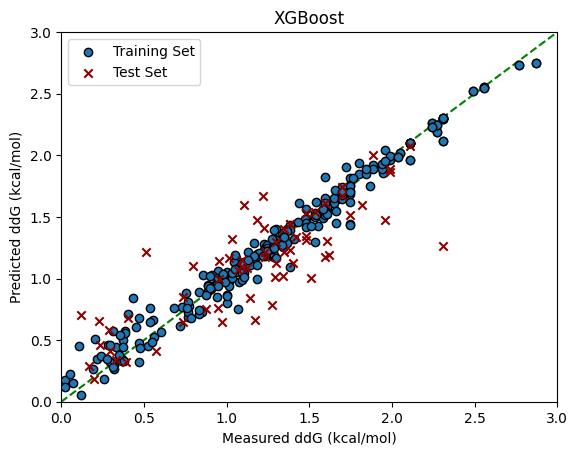

In [238]:
weights = np.ones_like(ytrain)  # Use equal weights for all samples initially

weights[ytrain < 1] = 1
weights[ytrain > 2] = 2
X_train_weighted = np.repeat(xtrainscaled, weights.astype(int), axis=0)
y_train_weighted = np.repeat(ytrain, weights.astype(int))
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.65,  subsample=0.7,learning_rate= 0.1,
                max_depth=7, alpha =1.2176218625771669, n_estimators = 600,min_child_weight=2,random_state=43)
rfe = RFE(estimator=xg_reg, n_features_to_select=28)  # Set the desired number of features
X_train_rfe = rfe.fit_transform(X_train_weighted, y_train_weighted)
X_test_rfe = rfe.transform(xtestscaled)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.65,  subsample=0.7,learning_rate= 0.1,
                max_depth=7, alpha =1.2176218625771669, n_estimators = 600,min_child_weight=2,random_state=43)
xg_reg.fit(X_train_rfe, y_train_weighted)

ypred = xg_reg.predict(X_train_rfe)
ypredtest = xg_reg.predict(X_test_rfe)


plt.plot([-3,3],[-3,3], color='green', linestyle='--')
plt.scatter(y_train_weighted, ypred, edgecolor='black', zorder=15, marker='o', label='Training Set')
plt.scatter(ytest, ypredtest, facecolor='darkred', zorder=20, marker='x', label='Test Set')
plt.xlabel('Measured ddG (kcal/mol)')
plt.xlim([0,3])
plt.ylim([0,3])
plt.ylabel('Predicted ddG (kcal/mol)')
plt.title('XGBoost')
plt.legend()
print(f'R2 score ------- MSE[(kcal/mol)^2] ------- MAE[kcal/mol]')
print(np.round(r2_score(ytest, ypredtest),3),'           ',
np.round(mean_squared_error(ytest, ypredtest),3) ,'                   ',
np.round(mean_absolute_error(ytest, ypredtest),3))

# Saving results in separate CSV files as outlined above
train_results_df = pd.DataFrame({
    'Actual_Train': y_train_weighted,
    'Predicted_Train': ypred
})
train_results_df.to_csv('training_results.csv', index=False)

test_results_df = pd.DataFrame({
    'Actual_Test': ytest,
    'Predicted_Test': ypredtest
})
test_results_df.to_csv('testing_results.csv', index=False)



In [239]:
feature_ranking = rfe.ranking_

# Get the indices of the selected features
selected_feature_indices = np.where(feature_ranking == 1)[0]

# Use the indices to get the corresponding feature names from the original feature matrix
selected_feature_names = xtrain.columns[selected_feature_indices]

# Print or use the selected feature names as needed
print("Selected Features:", selected_feature_names,len(selected_feature_names))


Selected Features: Index(['Kappa1electrophile', 'Kappa1nucleophile', 'MinEStateIndexelectrophile',
       'MinPartialChargeelectrophile', 'MinPartialChargenucleophile',
       'MolLogPelectrophile', 'ExactMolWtelectrophile', 'Kappa1',
       'MaxPartialCharge', 'MinPartialCharge', 'ster2', 'ster3',
       'Temperature (Kelvin)', 'mean_polar', 'biggest distance', 'L_e',
       'Bmax_e', 'Bmin_n', 'disp_e', 'disp_n', 'Box_vol', 'Ncat_alif',
       'Ncat_arom', 'simddg_e', 'min_ddg_e', 'max_ddg_e', 'simddg_n',
       'min_ddg_n'],
      dtype='object') 28


In [240]:
from itertools import product

unique_values = [alldesc[col].unique() for col in ['nucleophile SMILES', 'starting electrophile SMILES']]




existing_combinations = alldesc[['nucleophile SMILES', 'starting electrophile SMILES']].values.tolist()

# Filter rows from the original dataset where elements in list one occur
constrain_one_rows = alldesc[alldesc['nucleophile SMILES'].isin(list_one)]
constrain_one_rows = constrain_one_rows[['nucleophile SMILES', 'starting electrophile SMILES']].drop_duplicates()

constrain_two_rows = alldesc[alldesc['nucleophile SMILES'].isin(list_two)]
constrain_two_rows = constrain_two_rows[['nucleophile SMILES', 'starting electrophile SMILES']].drop_duplicates()
constrain_two_rows = list(product([*constrain_two_rows['nucleophile SMILES'].unique()], [*constrain_two_rows['starting electrophile SMILES'].unique()]))

constrain_three_rows = alldesc[alldesc['nucleophile SMILES'].isin(list_three)]
constrain_three_rows = constrain_three_rows[['nucleophile SMILES', 'starting electrophile SMILES']].drop_duplicates()
constrain_three_rows = list(product([*constrain_three_rows['nucleophile SMILES'].unique()], [*constrain_three_rows['starting electrophile SMILES'].unique()]))



combinations_unique_values = constrain_two_rows+list(constrain_one_rows.values)+constrain_three_rows

# Create a new DataFrame to store the combinations
comb_df = pd.DataFrame(combinations_unique_values,columns=['nucleophile SMILES', 'starting electrophile SMILES'])
comb_df

,nucleophile SMILES,starting electrophile SMILES
0,C=CC[Si](C)(C)C,O=Cc2ccc1ccccc1c2
1,C=CC[Si](C)(C)C,COc2ccc1cc(C=O)ccc1c2
2,C=CC[Si](C)(C)C,O=Cc2ccc1cc(Br)ccc1c2
3,C=CC[Si](C)(C)C,O=Cc1ccccc1
4,C=CC[Si](C)(C)C,O=Cc1ccccc1F
...,...,...
2907,C1=CCCC=C1,O=C/C=C/c1ccc(Cl)cc1
2908,C1=CCCC=C1,O=C/C=C/c1ccco1
2909,C1=CCCC=C1,C/C=C(C)/C=O
2910,C1=CCCC=C1,O=CC1=CCCC1


In [241]:
key_columns = ['3,3 Catalyst Substituent ', 'N Catalyst Substituent']

# Create a new DataFrame to store the appended combinations
result_df = pd.DataFrame()

# Iterate through each combination
unique_values = [alldesc[col].unique() for col in key_columns]

import itertools
combinations = [
    (*row, element,element2)
    for index, row in comb_df.iterrows()
    for element in unique_values[0]
    for element2 in unique_values[1]
]

In [242]:
comb_df = pd.DataFrame(combinations, columns=['nucleophile SMILES', 'starting electrophile SMILES','3,3 Catalyst Substituent ' ,'N Catalyst Substituent',])


# Display the result DataFrame
df1 = alldesc[['nucleophile SMILES','Kappa1nucleophile','MaxPartialChargenucleophile','MinEStateIndexnucleophile','MinPartialChargenucleophile','MolLogPnucleophile','qednucleophile','ExactMolWtnucleophile',
               'L_n', 'Bmin_n', 'Bmax_n','bur_vol_n','tot_V_n', 'disp_n','reaction_group_1', 'reaction_group_2', 'reaction_group_3']].drop_duplicates()#,'2_crippen_x', '3_crippen_x', '4_crippen_x'
df2 = alldesc[['starting electrophile SMILES','Kappa1electrophile','MaxPartialChargeelectrophile','MinEStateIndexelectrophile','MinPartialChargeelectrophile','MolLogPelectrophile','qedelectrophile','ExactMolWtelectrophile',
               'L_e', 'Bmin_e', 'Bmax_e', 'bur_vol_e','tot_V_e', 'disp_e']].drop_duplicates()#'2_crippen_y','3_crippen_y', '4_crippen_y'
df3 = alldesc[['3,3 Catalyst Substituent ','Kappa1','ExactMolWt', 'MinEStateIndex', 'MinPartialCharge','MaxPartialCharge', 'MolLogP',  'ster1', 'ster2',
                'ster3', 'HOMO', 'LUMO', 'mean_polar', 'biggest distance','Vbur75' ,'Box_vol','RAxis_2','RAxis_3','major_axis']].drop_duplicates()
df4 = alldesc[['N Catalyst Substituent','Ncat_alif', 'Ncat_arom']].drop_duplicates()

combinations_df = pd.merge(comb_df ,df1, on='nucleophile SMILES', how='left')
combinations_df = pd.merge(combinations_df, df2, on='starting electrophile SMILES', how='left')
combinations_df = pd.merge(combinations_df, df3, on='3,3 Catalyst Substituent ', how='left')
combinations_df = pd.merge(combinations_df, df4, on='N Catalyst Substituent', how='left')



_, x_comb = preprocess(xtrain_pre, combinations_df ,mat_e, dict_e,mat_n, dict_n,sim_par=0.7)
x_comb['Temperature (Kelvin)']=xtrain['Temperature (Kelvin)'].value_counts().idxmax()

# Reorder columns 
df1_reordered = x_comb[xtrain.columns]
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(xtrain)
VD_X_df = pd.DataFrame(rfe.transform(minmax_scaler.transform(df1_reordered )),columns=selected_feature_names)
Full_Comb_df = pd.concat([comb_df,VD_X_df], axis=1)
Full_Comb_df.to_csv("sterimol/Virtualdataset.csv")


/tmp/ipykernel_61511/132606820.py:50: RuntimeWarning:

invalid value encountered in divide

/tmp/ipykernel_61511/132606820.py:72: RuntimeWarning:

Mean of empty slice



In [243]:
import umap
react_comb_df = pd.DataFrame(combinations_unique_values,columns=['nucleophile SMILES', 'starting electrophile SMILES'])


# Display the result DataFrame
df1 = x_comb[['nucleophile SMILES','Kappa1nucleophile','MaxPartialChargenucleophile','MinEStateIndexnucleophile','MinPartialChargenucleophile','MolLogPnucleophile','qednucleophile','ExactMolWtnucleophile',
               'L_n', 'Bmin_n', 'Bmax_n','bur_vol_n','tot_V_n', 'disp_n']].drop_duplicates()#,'2_crippen_x', '3_crippen_x', '4_crippen_x'
df2 = x_comb[['starting electrophile SMILES','Kappa1electrophile','MaxPartialChargeelectrophile','MinEStateIndexelectrophile','MinPartialChargeelectrophile','MolLogPelectrophile','qedelectrophile','ExactMolWtelectrophile',
               'L_e', 'Bmin_e', 'Bmax_e', 'bur_vol_e','tot_V_e', 'disp_e']].drop_duplicates()#'2_crippen_y','3_crippen_y', '4_crippen_y'

               
combinations_df = pd.merge(react_comb_df ,df1, on='nucleophile SMILES', how='left')

combinations_df = pd.merge(combinations_df,df2, on='starting electrophile SMILES', how='left')

import umap.umap_ as umap
def Umap_reduc(df,num_reactions,n=2):
    minmax_scaler = MinMaxScaler()
    minmax_scaler.fit(df)
    X = minmax_scaler.transform(df)


    umap_model = umap.UMAP(n_components=n,min_dist=0.1,  
    n_neighbors=num_reactions)

    # Fit and transform your data
    X_umap = pd.DataFrame(umap_model.fit_transform(X))
    return X_umap


raect_reduced = Umap_reduc(combinations_df[combinations_df.columns[2:]],15 ,2)

In [244]:
umap_df = pd.merge(combinations_df[combinations_df.columns[:2]], raect_reduced,left_index=True, right_index=True)

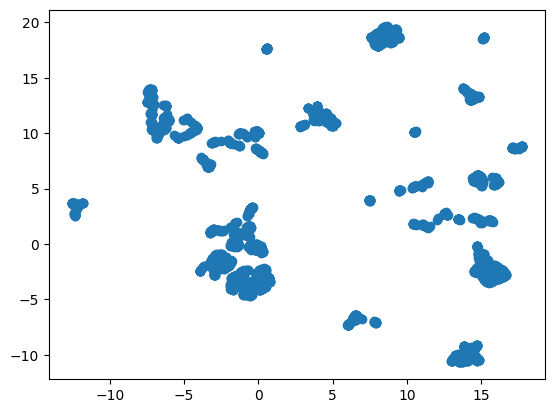

In [245]:
umap_df.set_axis(['nucleophile SMILES', 'starting electrophile SMILES', 'UMAP_1', 'UMAP_2'], axis=1)
plt.scatter(raect_reduced[0],raect_reduced[1])

In [246]:
import plotly.express as px

range_, inertia = get_clusters(combinations_df[combinations_df.columns[2:]],80)
fig = px.scatter(x=range_, y=inertia,
                labels={'x':'# of Clusters', 'y':'Inertia'},
                template='simple_white'
                )

fig.update_traces(marker=dict(size=17,
                              line=dict(width=2,
                                        color='Black')),
                  selector=dict(mode='markers'))

fig.update_xaxes(mirror=True)
fig.update_yaxes(mirror=True)

fig.update_yaxes( row=1, col=1)

fig.update_layout(
    font_size=20,
)

fig.show()

/home/user/Desktop/MS/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/user/Desktop/MS/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/user/Desktop/MS/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/user/Desktop/MS/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/user/Desktop/MS/env/lib/python3.10/site-packages/sklearn/clust

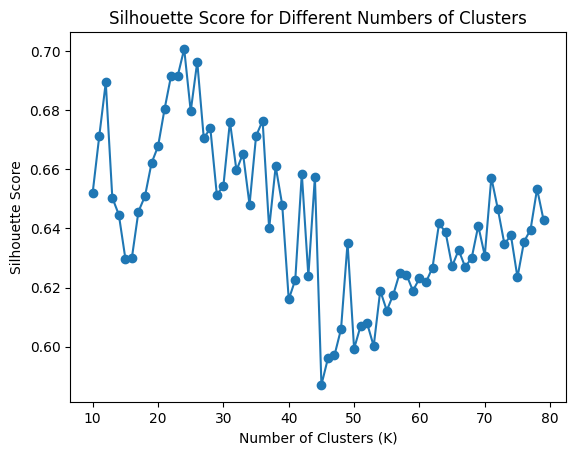

Optimal number of clusters (K): 24


In [247]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
k_range = range(10, 80)
umap_cords = Umap_reduc(combinations_df[combinations_df.columns[2:]],10 ,10)#combinations_df[combinations_df.columns[2:]]#Umap_reduc(combinations_df[combinations_df.columns[2:]],15 ,10)#
for k in k_range:
    # Fit KMeans clustering model
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(umap_cords)

    # Compute the silhouette score
    silhouette_avg = silhouette_score(umap_cords, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plotting the Silhouette scores
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

# Find the optimal number of clusters with the highest silhouette score
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters (K): {optimal_k}")

In [248]:
labels = k_cluster(combinations_df[combinations_df.columns[2:]],optimal_k)
combinations_df=pd.concat([combinations_df[combinations_df.columns[:2]],pd.DataFrame({'cluster':labels})],axis=1)

In [249]:
VD_ypred = {'ddg':xg_reg.predict(VD_X_df)}
VD_pred = pd.concat([Full_Comb_df[Full_Comb_df.columns[:4]],pd.DataFrame(VD_ypred)], axis=1)
rt=xtrain['Temperature (Kelvin)'].value_counts().idxmax()*1.988*10**(-3)
VD_pred['ee'] =(1-np.exp(-VD_pred['ddg']/rt))/(1+np.exp(-VD_pred['ddg']/rt))
VD_pred=pd.merge(VD_pred,combinations_df,on=['nucleophile SMILES', 'starting electrophile SMILES'], how='left')
VD_pred.to_csv("sterimol/Virtualpredictions.csv")

In [250]:
Umap_df = pd.merge(VD_pred,umap_df,on=['nucleophile SMILES', 'starting electrophile SMILES'], how='right')
Umap_df.to_csv("sterimol/UMAP_IDPi.csv")

In [251]:
umap_df

,nucleophile SMILES,starting electrophile SMILES,0,1
0,C=CC[Si](C)(C)C,O=Cc2ccc1ccccc1c2,14.409115,13.065628
1,C=CC[Si](C)(C)C,COc2ccc1cc(C=O)ccc1c2,14.230751,13.643481
2,C=CC[Si](C)(C)C,O=Cc2ccc1cc(Br)ccc1c2,14.404072,13.430180
3,C=CC[Si](C)(C)C,O=Cc1ccccc1,14.516341,13.174217
4,C=CC[Si](C)(C)C,O=Cc1ccccc1F,14.420994,13.082292
...,...,...,...,...
2907,C1=CCCC=C1,O=C/C=C/c1ccc(Cl)cc1,15.027036,-1.045713
2908,C1=CCCC=C1,O=C/C=C/c1ccco1,16.188086,-3.144469
2909,C1=CCCC=C1,C/C=C(C)/C=O,16.377171,-2.326253
2910,C1=CCCC=C1,O=CC1=CCCC1,16.532677,-2.556522
